# 1) Data Prediction:
## Choose 4 different methods of regression 
### a) Linear regression
### b) Lasso Regression

# Load the first dataset

In [94]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

#models for linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

#models for Lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn import metrics
from statistics import stdev

In [95]:
input_file = 'Moneyball.csv'
Mb_data = pd.read_csv(input_file,  sep = ',', header = 0)
Mb_data

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,?,?,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4,5,162,0.306,0.37799999999999995
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5,4,162,0.315,0.40299999999999997
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,?,?,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,?,?,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,?,?,161,?,?
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,?,?,161,?,?
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1,2,165,?,?
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,?,?,163,?,?


# Expleration

$\sum_{i = 0}^n(y-\hat{y})^2$ to minimaze

# Data Precondition

In [96]:
cols_to_drop = ['Team', 'League','Year', 'Playoffs', 'G','RankPlayoffs','RankSeason','OOBP','OSLG']
Mb_prep = Mb_data.drop(cols_to_drop, axis = 1)
Mb_prep
#Mb_prep.replace("?",0, inplace=True)
#Mb_prep = Mb_prep[Mb_prep.OOBP != 0]
#Mb_prep[['OOBP','OSLG']] = Mb_prep[['OOBP','OSLG']].astype(float)

#cols_to_drop = ['RS','RA','OBP','SLG','BA']
Mb_goal = Mb_prep.W
Mb_train = Mb_prep[['RS','RA','OBP','SLG','BA']]

#cols_to_drop = ['OOBP','OSLG']
#Mb_train = Mb_prep.drop(cols_to_drop, axis = 1)
#Mb_goal[['OOBP','OSLG']] = Mb_goal[['OOBP','OSLG']].astype(float)
#Mb_train
Mb_train

,RS,RA,OBP,SLG,BA
0,734,688,0.328,0.418,0.259
1,700,600,0.320,0.389,0.247
2,712,705,0.311,0.417,0.247
3,734,806,0.315,0.415,0.260
4,613,759,0.302,0.378,0.240
...,...,...,...,...,...
1227,705,759,0.330,0.390,0.260
1228,706,626,0.321,0.394,0.268
1229,878,690,0.341,0.441,0.278
1230,774,664,0.335,0.394,0.271


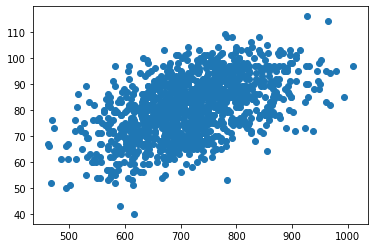

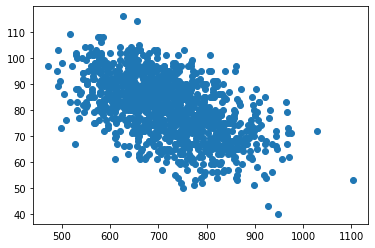

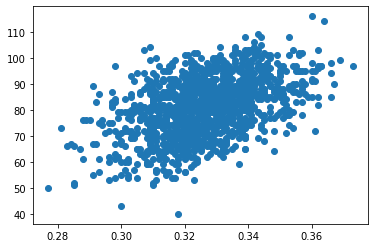

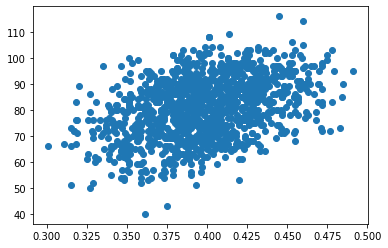

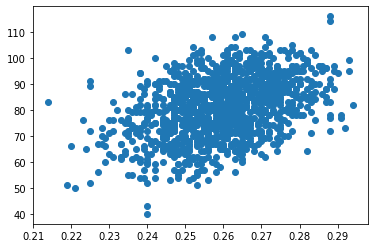

In [97]:
plt.figure()
plt.scatter(Mb_train.RS,Mb_goal)

plt.figure()
plt.scatter(Mb_train.RA,Mb_goal)

plt.figure()
plt.scatter(Mb_train.OBP,Mb_goal)

plt.figure()
plt.scatter(Mb_train.SLG,Mb_goal)

plt.figure()
plt.scatter(Mb_train.BA,Mb_goal)

<Figure size 432x288 with 0 Axes>

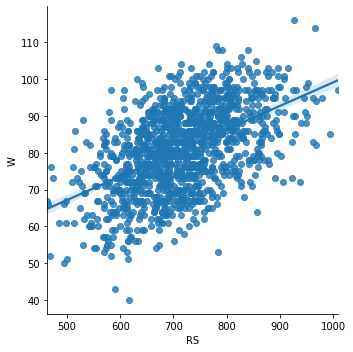

<Figure size 432x288 with 0 Axes>

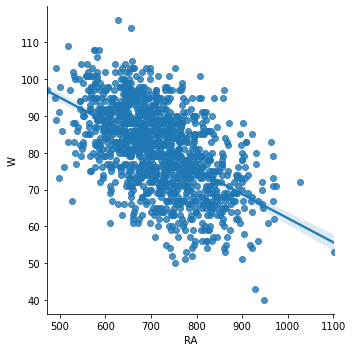

<Figure size 432x288 with 0 Axes>

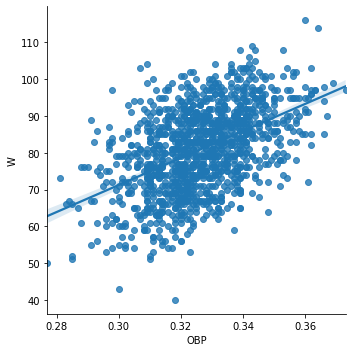

<Figure size 432x288 with 0 Axes>

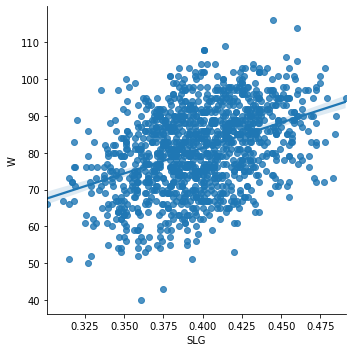

<Figure size 432x288 with 0 Axes>

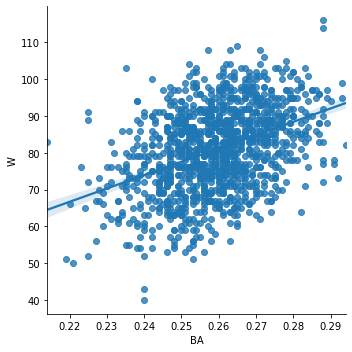

In [98]:
plt.figure()
sns.lmplot("RS","W",Mb_prep)

plt.figure()
sns.lmplot("RA","W",Mb_prep)

plt.figure()
sns.lmplot("OBP","W",Mb_prep)

plt.figure()
sns.lmplot("SLG","W",Mb_prep)

plt.figure()
sns.lmplot("BA","W",Mb_prep)

# a) Linear Regression

In [99]:
Y = Mb_goal
X = Mb_train[['RS','RA','OBP','SLG','BA']]
#X = Mb_train[['RS','RA']]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
# grid search

In [100]:
linreg = LinearRegression(normalize = True)
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [101]:
linreg.coef_
score = linreg.score(X_test,Y_test)
print("score: ",score)
Y_pred= linreg.predict(X_train)

score:  0.8877439871498782


In [102]:
Y_train = list(Y_train)

In [103]:
n = len(Wins)
Mid = 0
for i in range(n):
    Mid += np.abs(Y_train[i]-Wins[i])
    
print(Mid/n)

3.2404455947615185


In [104]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_train, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_train, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

Mean Absolute Error: 3.2404455947615167
Mean Squared Error: 16.165322272824717
Root Mean Squared Error: 4.020612176376219


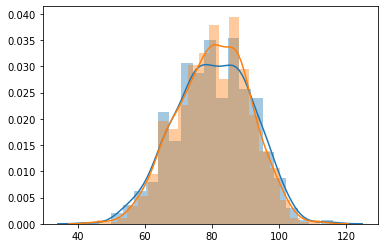

In [113]:
sns.distplot(Y_train)
sns.distplot(Y_pred)

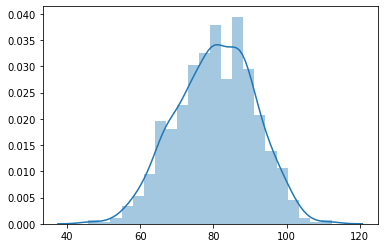

In [112]:
sns.distplot(Y_pred)

In [107]:
np.mean(Wins)

80.48491879350348

In [108]:
np.mean(Y_train)

80.48491879350348

In [110]:
stdev(Y_train)

11.443711861387127

In [111]:
stdev(Wins)

10.713283522745172

In [ ]:
linreg.

# b)Lasso Regression

In [69]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()

In [70]:
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,2,5,10,20,30,35,40,45,50,55,100]}
#parameters = {'alpha':[35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring = 'neg_mean_squared_error',cv = 5)
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [71]:
#X = Mb_train[['RS','RA']]
#Y = Mb_goal
lasso_regressor.fit(X_train,Y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)


/home/alexander/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5462.044158013122, tolerance: 8.635013062409287
  positive)
/home/alexander/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5442.780540864959, tolerance: 8.997056023222061
  positive)
/home/alexander/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5682.0070882403015, tolerance: 8.915258115942029
  positive)
/home/alexander/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase th

{'alpha': 1e-15}
-16.48601725670427


/home/alexander/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6809.220242645456, tolerance: 11.275530394431556
  positive)


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [72]:
prediction_lasso = lasso_regressor.predict(X_test)

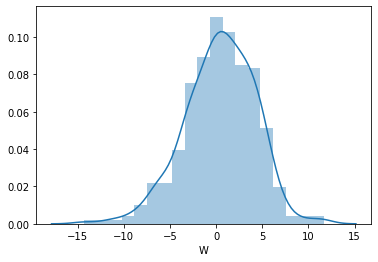

In [73]:
sns.distplot(y_test-prediction_lasso)